# Importación de un nodo, como módulo de una librería
Nuevamante esto es útil cuando estas en una etapa de experiemntación dentro de un notebook. Puedes definir una serie de nodos (funciones) y ejecutarlas directamente en el notebook para poder hacer pruebas en el procesmaiento que estas planteando
  

## 1) Añade el Directorio src/ al PYTHONPATH
Para que Python pueda encontrar tus módulos, debes asegurarte de que el directorio src/ esté en tu PYTHONPATH


In [1]:
import sys
import os

# Establece la ruta al directorio raíz del proyecto
project_path = "/Users/orlandoandrade/Documents/Maestria en inteligencia artificial aplicada/Materias/3 trimestre/Repositorio/Repositorio grupal/machine-learning-operations/mlops"
src_path = os.path.join(project_path, "src")

# Añade src/ al sys.path si no está ya presente
if src_path not in sys.path:
    sys.path.append(src_path)
    
# NOTA: sys.path: Es una lista que contiene las rutas en las que Python busca los módulos y paquetes cuando los importas en un script. Si una carpeta no está en esta lista, Python no puede encontrar los archivos dentro de esa carpeta cuando intentas importarlos    

## 2) Importación de nodos 


In [2]:
from mlops.pipelines.EDA import boxplot # Importacion de funciones declaradas 

## 3) Prueba de los modulos 
Inicializar el Contexto de Kedro (recomendado). Si tus nodos dependen de datasets definidos en el catálogo de Kedro o de parámetros, es conveniente inicializar el contexto de Kedro para acceder al catálogo y a los parámetros.



### 3.1) Inicializando le sesión de Kedro 

In [3]:
import os
from kedro.framework.session import KedroSession
from kedro.framework.startup import bootstrap_project

# Getting the root path 
path = os.getcwd()  # Obtiene el directorio actual
root_path = os.path.dirname(path)  # Retrocede una carpeta, tengo que darle la dirección raiz del proeycto de Kedro
print(f"Directorio padre: {root_path}") 


bootstrap_project(project_path=root_path) # Como se puede observar en el output se muestra la configuracion que le dí al proyecto

[10/06/24 12:58:44] INFO     Using                                                                  ]8;id=916693;file:///Users/orlandoandrade/miniconda3/envs/Data_Science/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=210892;file:///Users/orlandoandrade/miniconda3/envs/Data_Science/lib/python3.11/site-packages/kedro/framework/project/__init__.py#249\249]8;;\
                             '/Users/orlandoandrade/miniconda3/envs/Data_Science/lib/python3.11/sit                
                             e-packages/kedro/framework/project/rich_logging.yml' as logging                       
                             configuration.                                                                        

Directorio padre: /Users/orlandoandrade/Documents/Maestria en inteligencia artificial aplicada/Materias/3 trimestre/Repositorio/Repositorio grupal/machine-learning-operations/mlops



ProjectMetadata(
    config_file=PosixPath('/Users/orlandoandrade/Documents/Maestria en inteligencia artificial aplicada/Materias/3 trimestre/Repositorio/Repositorio grupal/machine-learning-operations/mlops/pyproject.toml'),
    package_name='mlops',
    project_name='MLops',
    project_path=PosixPath('/Users/orlandoandrade/Documents/Maestria en inteligencia artificial aplicada/Materias/3 trimestre/Repositorio/Repositorio grupal/machine-learning-operations/mlops'),
    source_dir=PosixPath('/Users/orlandoandrade/Documents/Maestria en inteligencia artificial aplicada/Materias/3 trimestre/Repositorio/Repositorio grupal/machine-learning-operations/mlops/src'),
    kedro_init_version='0.19.8',
    tools=['Linting', 'Testing', 'Custom Logging', 'Documentation', 'Data Structure', 'Kedro Viz'],
    example_pipeline='False'
)

In [4]:
# Create a Kedro Session and Load the Context
with KedroSession.create(project_path=root_path) as session:
    context = session.load_context()

### 3.2) Importando catalogo y sets de datos declarados 

In [5]:
catalog = context.catalog
catalog 

[10/06/24 12:59:46] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=530158;file:///Users/orlandoandrade/miniconda3/envs/Data_Science/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=532005;file:///Users/orlandoandrade/miniconda3/envs/Data_Science/lib/python3.11/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         


{'raw_data': "kedro_datasets.pandas.excel_dataset.ExcelDataset(filepath=PurePosixPath('/Users/orlandoandrade/Documents/Maestria "
             'en inteligencia artificial aplicada/Materias/3 '
             'trimestre/Repositorio/Repositorio '
             "grupal/machine-learning-operations/mlops/data/01_raw/ENB2012_data.xlsx'), "
             "protocol='file', load_args={'engine': 'openpyxl'}, "
             "save_args={'index': False}, writer_args={'engine': 'openpyxl'})",
 'parameters': "kedro.io.memory_dataset.MemoryDataset(data='<dict>')"}

In [6]:
dataset =  catalog.load("raw_data")
dataset.head(n=5)

[10/06/24 13:00:10] INFO     Loading data from raw_data (ExcelDataset)...                       ]8;id=370504;file:///Users/orlandoandrade/miniconda3/envs/Data_Science/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=768309;file:///Users/orlandoandrade/miniconda3/envs/Data_Science/lib/python3.11/site-packages/kedro/io/data_catalog.py#539\539]8;;\

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 3.3) Uso de la función declarada (módulo de la libreria o nodo de Kedro)

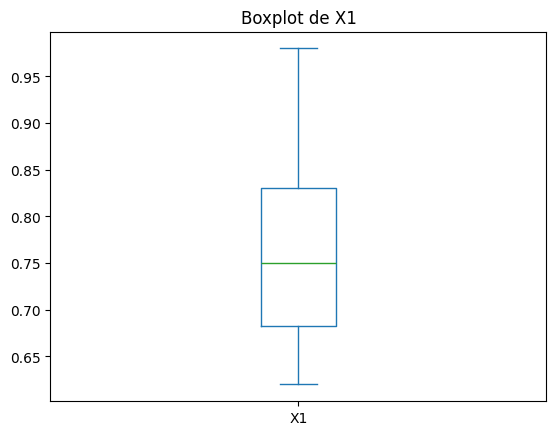

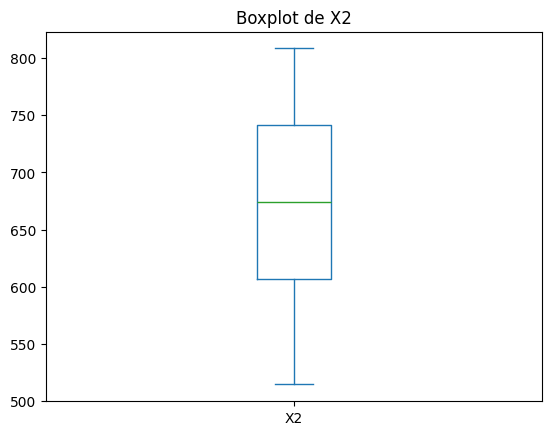

In [8]:
boxplot(dataset=dataset, columns =["X1", "X2"]) # Vease como puedo utiliar la función declarada , importandola como un modulo de la libreria creada